## Facets

https://www.coursera.org/learn/data-analysis-r/lecture/XXkuD/aesthetics-and-facets

Facet functions let you display smaller groups or subsets of your data. A facet is a side or section of an object. Facets show different sides of your data by placing each subset on its own plot. 

`ggplot2` has two functions for faceting: `facet_wrap` and `facet_grid`.

```
library(ggplot2)
library(palmerpenguins)

ggplot(data=penguins, aes(x=flipper_length_mm, y=body_mass_g)) +
  geom_point(aes(color=species)) +
  facet_wrap(~species)

```

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv"

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

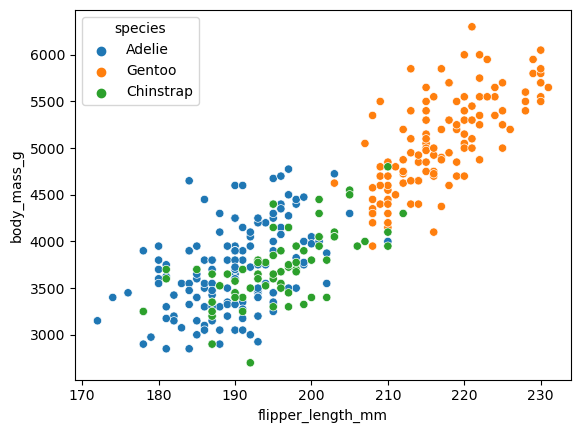

In [2]:
penguins = pd.read_csv(url)

# Here's the normal scatterplot:
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=penguins)

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 42.1% of the points cannot be placed; y

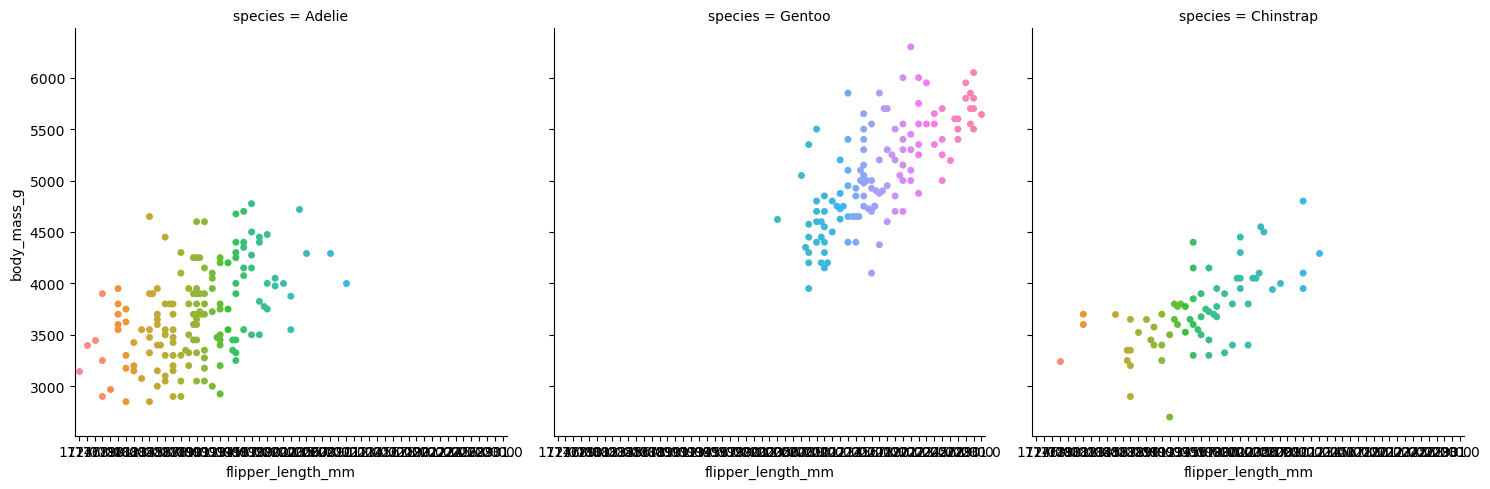

In [3]:
# And here it is "facet_wrap" by species. In seaborn, we use the catplot() with col="species"
sns.catplot(data=penguins, x="flipper_length_mm", y="body_mass_g", 
            kind="swarm", col="species", col_wrap=3)


Successfully plotted similar plots to ggplot2's facets, but also getting a bunch of this error:

> _UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot._

This error message appears when the number of data points being plotted is so high that it's difficult to display all of the points clearly in the plot. The swarmplot function in seaborn uses a method called "swarming" to spread out overlapping points so that they can be seen clearly. However, if there are too many points, some of them will still overlap, resulting in this warning.

To resolve this issue, you can try one of the following:

1. Decrease the size of the markers: This can be done by specifying the size parameter in the sns.swarmplot function.
2. Use a different plot type: Instead of using sns.swarmplot, you can try using a different plot type, such as a stripplot, which will randomly jitter the points along the x-axis to prevent overlapping.
3. Subsample the data: If the data is too large, you may want to subsample the data to a smaller size so that the plot can be created without overlapping points.

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


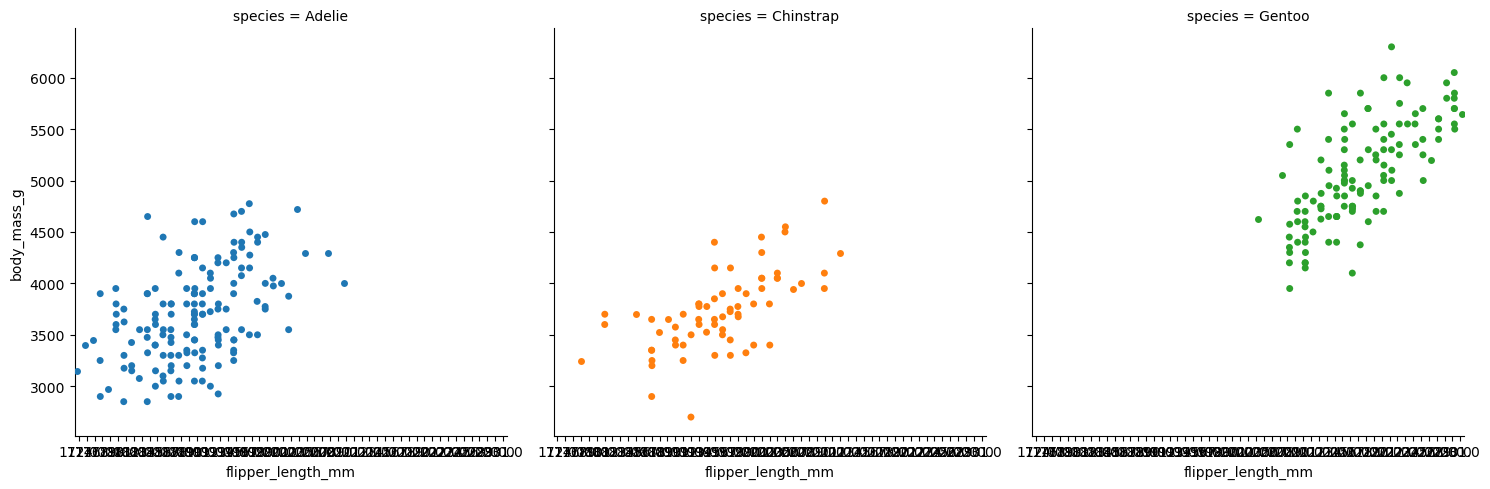

In [9]:
# Here we use the stripplot to add jitter.

sns.catplot(data=penguins, x="flipper_length_mm", y="body_mass_g",
            kind="strip", jitter=True, dodge=True, hue="species",
            col="species")

Getting some messages:
> _/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
> 
>    hue_mask = self.plot_hues[i] == hue_level_

But otherwise the plots are fine.

Let's try again with the diamonds dataset.

```
ggplot(data=diamonds) +
  geom_bar(mapping=aes(x=color, fill=cut)) +
  facet_wrap(~cut)
```

To do this in Python we use Seaborn's catplot method. To count the number of diamonds for each color, we use the groupby method on the diamonds DataFrame:

In [25]:
diamonds_url='https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/diamonds.csv'

diamonds = pd.read_csv(diamonds_url)

diamonds_grouped = diamonds.groupby(['cut', 'color']).size().reset_index(name='count')

In [26]:
diamonds_grouped

,cut,color,count
0,Fair,D,163
1,Fair,E,224
2,Fair,F,312
3,Fair,G,314
4,Fair,H,303
5,Fair,I,175
6,Fair,J,119
7,Good,D,662
8,Good,E,933
9,Good,F,909


This creates a new DataFrame, diamonds_grouped, that has 3 columns: 'cut', 'color', and 'count'.

We can then use this DataFrame to plot the faceted bar chart with the following code:

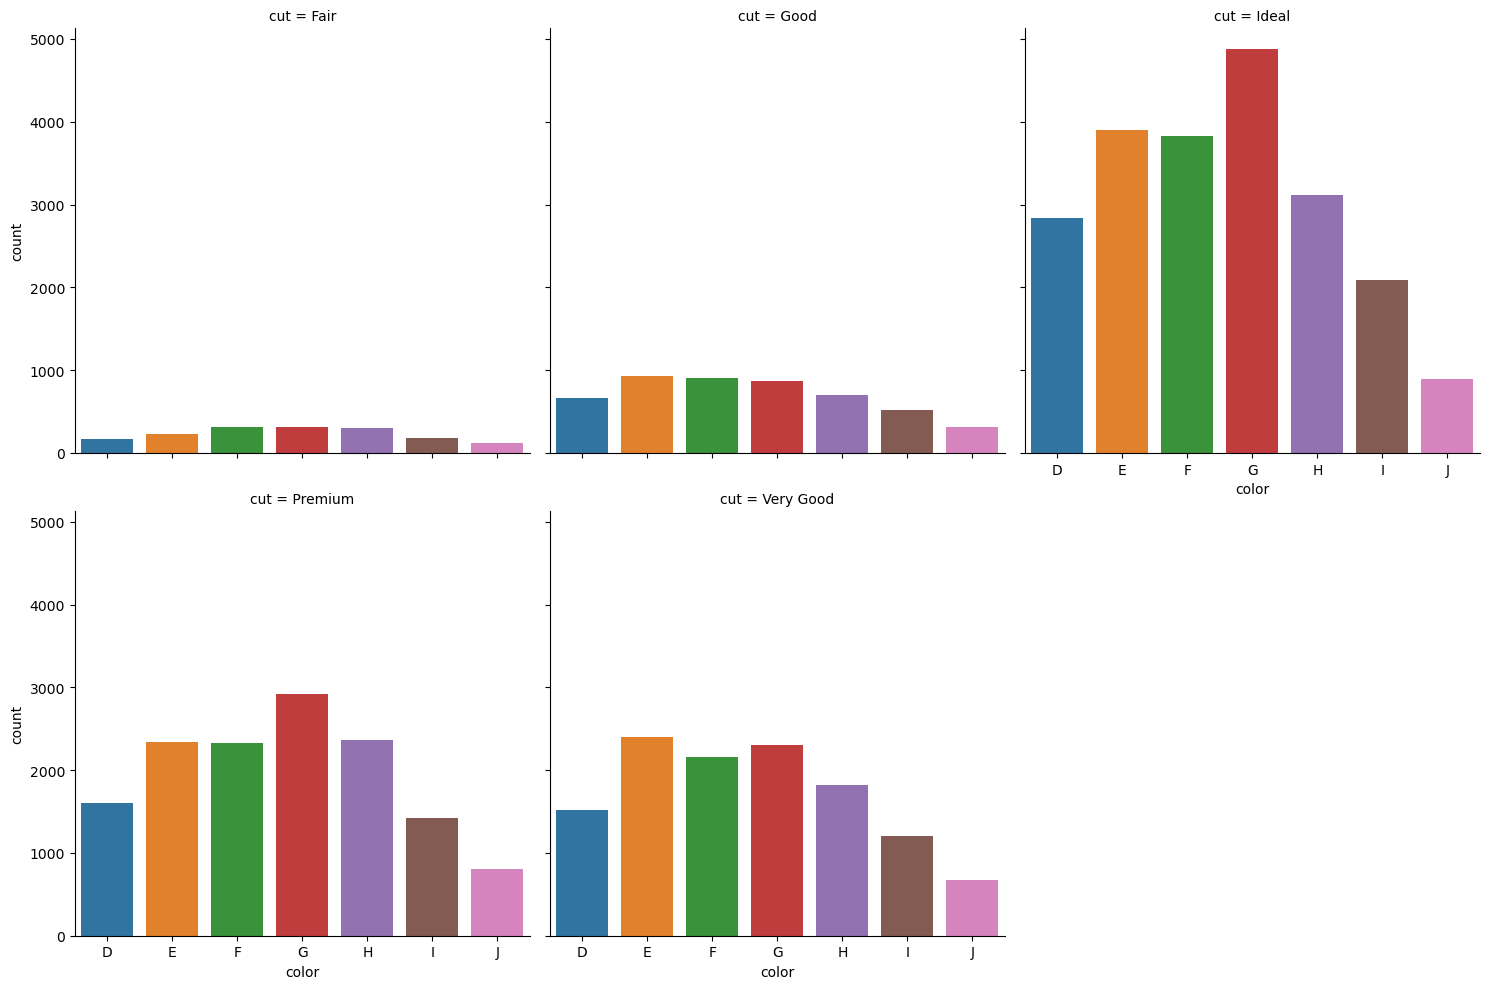

In [27]:
sns.catplot(data=diamonds_grouped, x="color", y="count", kind="bar", col="cut", col_wrap=3)

To facet your plot with two variables, use the facet underscore grid function.

Facet underscore grid will split the plot into facets vertically by the values of the first variable and horizontally by the values of the second variable.

For example, we can take our penguins plot and use facet underscore grid with the two variables, sex and species. 

```
ggplot(data=penguins, aes(x=flipper_length_mm, y=body_mass_g)) +
  geom_point(aes(color=species)) +
  facet_grid(sex~species)
```

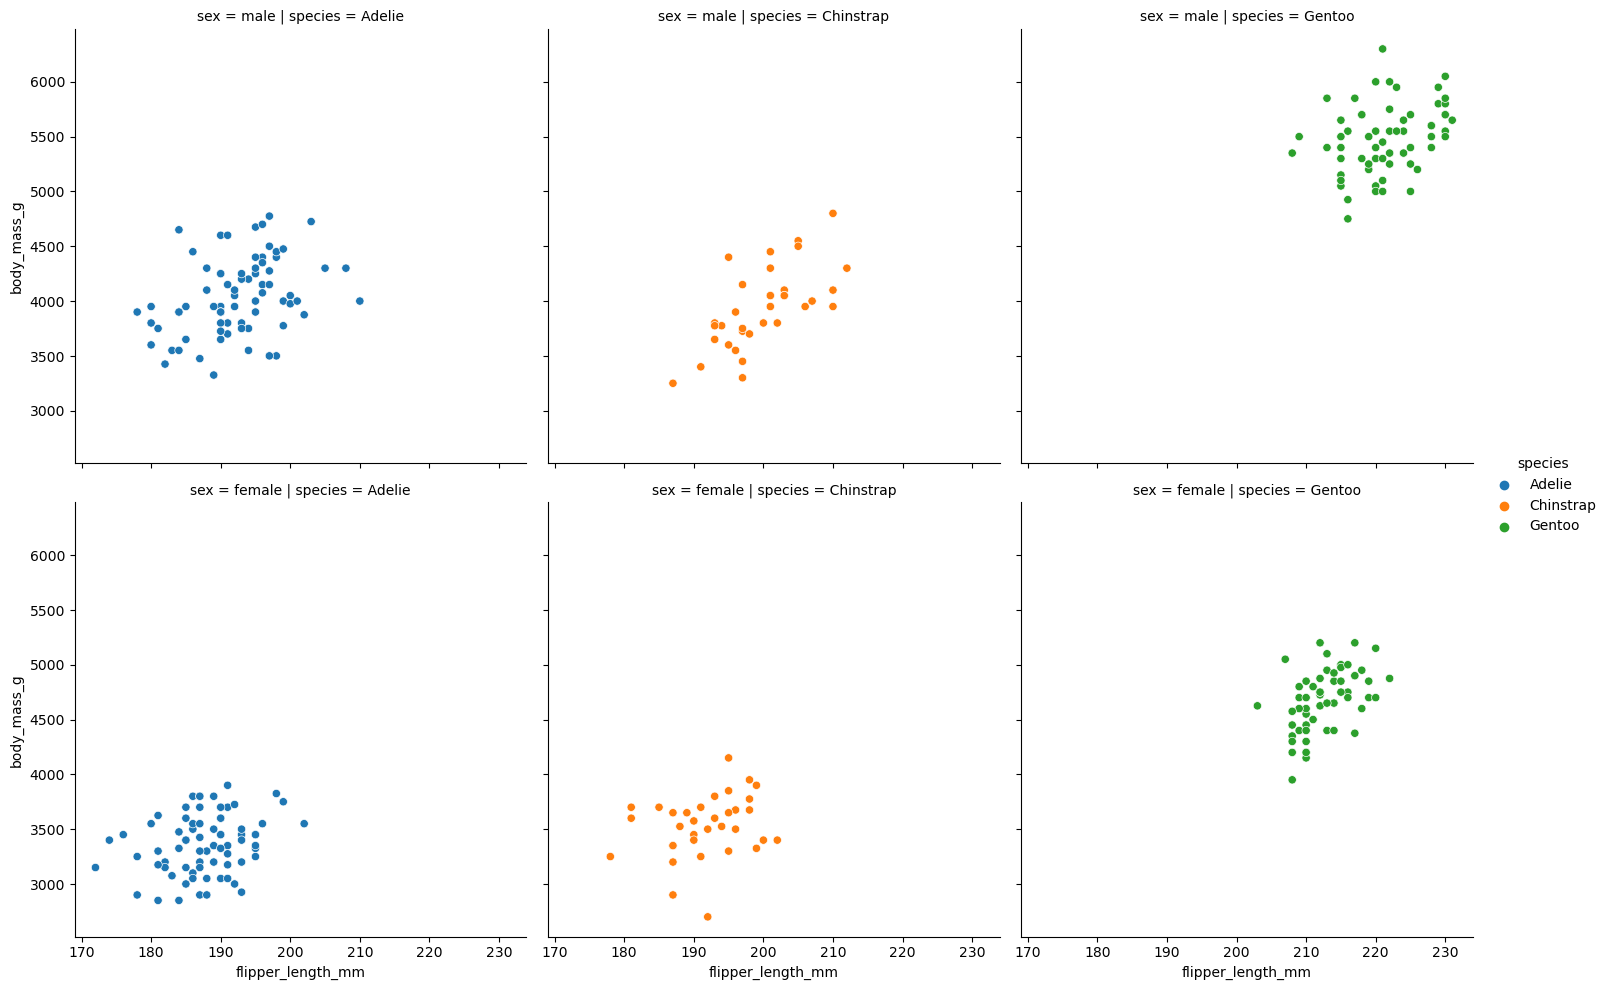

In [29]:
sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g",
            kind="scatter", col="species", row="sex", hue="species")

Pretty nice. We can switch the facet variable around to see the relationships in the penguins.

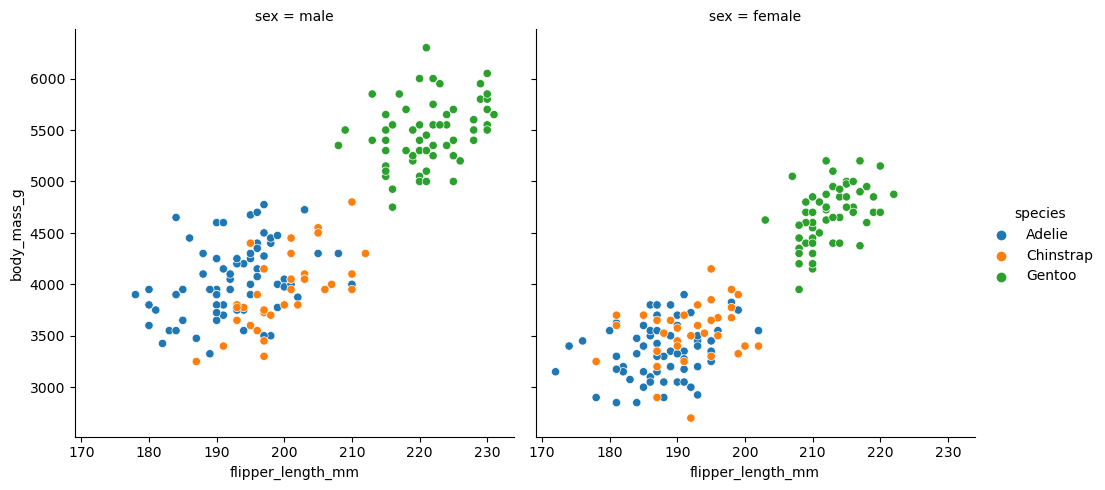

In [30]:
sns.relplot(data=penguins, x="flipper_length_mm", y="body_mass_g",
            kind="scatter", col="sex", hue="species")